In [79]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def make_x_y(deg=2):
    X = np.array([*range(-100,100)]).reshape(-1,1) / 100

    poly_adder = PolynomialFeatures(degree=deg)
    X = poly_adder.fit_transform(X)

    thetas = np.array(np.random.randn(deg+1,1)).reshape(-1,1)
    # return thetas

    y = X.dot(thetas)
    y += np.random.normal(loc=0, scale=.1, size=(len(y),1))
    return X, y

def descend_step(thetas, gradient, step_size=.01):
    """Descend one step in the direction of gradient, multiplied by
    scalar step_size, by adding step_size*gradient to the coefficient vector
    thetas"""
    step = step_size*gradient
    return thetas + step 


def gradient_vector_thetas(X, y, thetas):
    residuals = y - X.dot(thetas)
    gradient = 2 * X.T.dot(residuals)
    return gradient

def add_intercept(X):
    """helper function to add bias/intercept column to a feature matrix X,
    returns X with a leading column of ones added"""
    X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
    return X_with_intercept


def batch_gradient_descent(X, y, eta0=.001, max_iter=10, thetas=None):
    X_bias = add_intercept(X)
    if thetas is None:
        thetas_ = np.random.randn(X_bias.shape[1],1)
    else:
        thetas_ = thetas
    
    theta_list = list([thetas_])
    for _ in range(max_iter):
        gradient_ = gradient_vector_thetas(X_bias, y, thetas_)
        thetas_ = descend_step(thetas_, gradient_, step_size=eta0)
        theta_list.append(thetas_)
    return theta_list

class LinRegScratch():
    def __init__(self, solver='closed'):
        self.solver = solver
    def fit(self, X, y):
        if self.solver == 'closed':
            # add an intercept column to X
            X_with_intercept = add_intercept(X)
            # make this accessible after fitting
            self.X_intercept = X_with_intercept

            self.thetas = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)
        elif self.solver == 'batch':
            self.theta_list = batch_gradient_descent(X, y)
            self.thetas = self.theta_list[-1]
        return self


    def predict(self, X):
        thetas = self.thetas
        X_predictor = np.c_[np.ones((X.shape[0],1)), X]
        self.predictions = X_predictor.dot(thetas)
        return self.predictions

X, y = make_x_y()


In [80]:
lin_reg_scratch = LinRegScratch(solver='batch')
lin_reg_scratch.fit(X, y)
preds = lin_reg_scratch.predict(X)

In [81]:
lin_reg_scratch.solver

'batch'

In [82]:
preds

array([[-0.65231625],
       [-0.65639444],
       [-0.66044854],
       [-0.66447855],
       [-0.66848449],
       [-0.67246634],
       [-0.6764241 ],
       [-0.68035779],
       [-0.68426739],
       [-0.6881529 ],
       [-0.69201433],
       [-0.69585168],
       [-0.69966495],
       [-0.70345413],
       [-0.70721923],
       [-0.71096025],
       [-0.71467718],
       [-0.71837003],
       [-0.72203879],
       [-0.72568347],
       [-0.72930407],
       [-0.73290059],
       [-0.73647302],
       [-0.74002137],
       [-0.74354563],
       [-0.74704581],
       [-0.75052191],
       [-0.75397392],
       [-0.75740185],
       [-0.7608057 ],
       [-0.76418546],
       [-0.76754114],
       [-0.77087274],
       [-0.77418025],
       [-0.77746368],
       [-0.78072303],
       [-0.78395829],
       [-0.78716947],
       [-0.79035657],
       [-0.79351958],
       [-0.79665851],
       [-0.79977335],
       [-0.80286411],
       [-0.80593079],
       [-0.80897339],
       [-0

In [83]:
# theta_fit = batch_gradient_descent(X, y)
# preds = add_intercept(X).dot(theta_fit[-1])
# preds

In [84]:
y

array([[-0.96595769],
       [-1.09829363],
       [-1.12281064],
       [-1.16833171],
       [-0.94912599],
       [-1.04100435],
       [-0.9298293 ],
       [-0.86907855],
       [-0.93611359],
       [-0.96837277],
       [-1.14536373],
       [-0.82552534],
       [-0.89388672],
       [-0.88127031],
       [-0.80518238],
       [-0.74942548],
       [-0.95906345],
       [-0.87994549],
       [-0.89446426],
       [-0.97571801],
       [-0.88037892],
       [-0.82079178],
       [-0.68594402],
       [-0.84854655],
       [-0.81815393],
       [-0.7678108 ],
       [-0.73526845],
       [-0.77977139],
       [-0.80784938],
       [-0.69889529],
       [-0.64247979],
       [-0.79370974],
       [-0.56949622],
       [-0.6701109 ],
       [-0.60822136],
       [-0.4711157 ],
       [-0.6902377 ],
       [-0.61838249],
       [-0.64114765],
       [-0.68392317],
       [-0.61901185],
       [-0.52270847],
       [-0.6206033 ],
       [-0.60174654],
       [-0.48467971],
       [-0

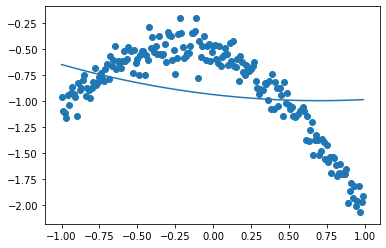

In [85]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 1], y)
# for _, i in enumerate(list(theta_fit)):
#     print(list(theta_fit)[i])
    # preds = add_intercept(X).dot()
    # plt.plot(preds)

plt.plot(X[:, 1], preds)

In [76]:
lin_reg_scratch.predict(X)

array([[-90331320.55553183],
       [-90063127.51555529],
       [-89797604.49108174],
       [-89534751.48211122],
       [-89274568.48864366],
       [-89017055.51067911],
       [-88762212.54821755],
       [-88510039.601259  ],
       [-88260536.66980343],
       [-88013703.75385085],
       [-87769540.85340127],
       [-87528047.9684547 ],
       [-87289225.09901111],
       [-87053072.24507052],
       [-86819589.40663293],
       [-86588776.58369833],
       [-86360633.77626672],
       [-86135160.98433812],
       [-85912358.2079125 ],
       [-85692225.4469899 ],
       [-85474762.70157027],
       [-85259969.97165364],
       [-85047847.25724001],
       [-84838394.55832937],
       [-84631611.87492172],
       [-84427499.20701708],
       [-84226056.55461544],
       [-84027283.91771677],
       [-83831181.29632112],
       [-83637748.69042845],
       [-83446986.10003878],
       [-83258893.52515212],
       [-83073470.96576843],
       [-82890718.42188776],
       [-82710

In [67]:
print(list(theta_fit)[0])

[[ 0.92950754]
 [ 0.01398864]
 [ 1.2397027 ]
 [-0.24398783]]


In [62]:
theta_fit

AttributeError: 'list' object has no attribute 'shape'